# Mobile Phone Price Prediction

# Team Members

Ahmet Erden - 090190743<br>
Baran Aslan - 090180347

# Dataset

Mobile Price Dataset This dataset contains some features of different phone models.These features are name of the phone, brand name, model of the phone, battery capacity in mAh, screen size in inches across opposite corners, whether the phone is touchscreen supported or not, the resolution of the phone along the width of the screen, the resolution of the phone along the height of the screen, number of processor cores, RAM available in phone in megabyte, internal storage of phone in gigabyte, resolution of rear camera in MP (0 if unavailable), resolution of front camera in MP (0 if unavailable), opearation system used in phone, whether phone has Wi-Fi functionality, whether phone has bluetooth functionality, whether phone has GPS functionality, number of SIM card slots in phone, whether phone has 3G network functionality, whether phone has 4G/LTE network functionality and price of the phone in INR.

# Goal

In this problem, we will try to estimate the price of a new phone by cleaning and analyzing the data using machine learning algorithms according to the features in the data. We will use Linear Regression, Random Forest Regression and Decision Tree Regression models since we will make price estimation in the problem. After testing these three models, we will try to predict with the most accurate model. If one of the models gets a high enough score, we hope it will help companies with a new phone launch with pricing.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv('ndtv_data_final.csv')
df

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1354,Intex Aqua A2,Intex,Aqua A2,1500,4.00,Yes,480,800,4,...,5.0,0.3,Android,Yes,Yes,Yes,2,Yes,No,2599
1355,1355,Videocon Infinium Z51 Nova+,Videocon,Infinium Z51 Nova+,2000,5.00,Yes,480,854,4,...,8.0,5.0,Android,Yes,Yes,Yes,2,Yes,No,2940
1356,1356,Intex Aqua Y4,Intex,Aqua Y4,1700,4.50,Yes,480,854,2,...,5.0,2.0,Android,Yes,Yes,No,2,Yes,No,2999
1357,1357,iBall Andi4 B20,iBall,Andi4 B20,1250,4.00,Yes,480,800,1,...,2.0,0.3,Android,Yes,Yes,Yes,2,Yes,No,2498


# Analysing, Exploring and Visualizing Data

In [3]:
df.columns

Index(['Unnamed: 0', 'Name', 'Brand', 'Model', 'Battery capacity (mAh)',
       'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y',
       'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera',
       'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS',
       'Number of SIMs', '3G', '4G/ LTE', 'Price'],
      dtype='object')

In [4]:
df.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [5]:
df.drop(columns='Unnamed: 0', inplace=True)

In [6]:
df.isnull().sum()

Name                      0
Brand                     0
Model                     0
Battery capacity (mAh)    0
Screen size (inches)      0
Touchscreen               0
Resolution x              0
Resolution y              0
Processor                 0
RAM (MB)                  0
Internal storage (GB)     0
Rear camera               0
Front camera              0
Operating system          0
Wi-Fi                     0
Bluetooth                 0
GPS                       0
Number of SIMs            0
3G                        0
4G/ LTE                   0
Price                     0
dtype: int64

There is no null value in the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    1359 non-null   object 
 1   Brand                   1359 non-null   object 
 2   Model                   1359 non-null   object 
 3   Battery capacity (mAh)  1359 non-null   int64  
 4   Screen size (inches)    1359 non-null   float64
 5   Touchscreen             1359 non-null   object 
 6   Resolution x            1359 non-null   int64  
 7   Resolution y            1359 non-null   int64  
 8   Processor               1359 non-null   int64  
 9   RAM (MB)                1359 non-null   int64  
 10  Internal storage (GB)   1359 non-null   float64
 11  Rear camera             1359 non-null   float64
 12  Front camera            1359 non-null   float64
 13  Operating system        1359 non-null   object 
 14  Wi-Fi                   1359 non-null   

There are 10 categorical variables and 11 numerical variables in the dataset.

In [8]:
df['Price'] = df['Price']*0.23 #Price has been converted Indian rupee to Turkish Lira.
df

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,12000,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,13569.54
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,6000,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,6439.77
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,24587.00
3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,14467.00
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,6000,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,11497.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,Intex Aqua A2,Intex,Aqua A2,1500,4.00,Yes,480,800,4,512,...,5.0,0.3,Android,Yes,Yes,Yes,2,Yes,No,597.77
1355,Videocon Infinium Z51 Nova+,Videocon,Infinium Z51 Nova+,2000,5.00,Yes,480,854,4,1000,...,8.0,5.0,Android,Yes,Yes,Yes,2,Yes,No,676.20
1356,Intex Aqua Y4,Intex,Aqua Y4,1700,4.50,Yes,480,854,2,512,...,5.0,2.0,Android,Yes,Yes,No,2,Yes,No,689.77
1357,iBall Andi4 B20,iBall,Andi4 B20,1250,4.00,Yes,480,800,1,256,...,2.0,0.3,Android,Yes,Yes,Yes,2,Yes,No,574.54


In [9]:
df.describe()

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,2938.489330,5.291310,811.543046,1490.777778,5.551141,2488.777778,30.654864,12.070199,7.037969,1.833701,2637.139890
std,873.514133,0.671357,270.707271,557.780120,2.196562,1664.440386,36.950241,8.948337,6.295448,0.374457,3187.224328
min,1010.000000,2.400000,240.000000,320.000000,1.000000,64.000000,0.064000,0.000000,0.000000,1.000000,113.620000
25%,2300.000000,5.000000,720.000000,1280.000000,4.000000,1000.000000,8.000000,8.000000,2.000000,2.000000,1095.605000
50%,3000.000000,5.200000,720.000000,1280.000000,4.000000,2000.000000,16.000000,12.200000,5.000000,2.000000,1609.770000
75%,3500.000000,5.700000,1080.000000,1920.000000,8.000000,3000.000000,32.000000,13.000000,8.000000,2.000000,2759.770000
max,6000.000000,7.300000,2160.000000,3840.000000,10.000000,12000.000000,512.000000,108.000000,48.000000,3.000000,40247.700000


## Analysis and Visualizing of Brand

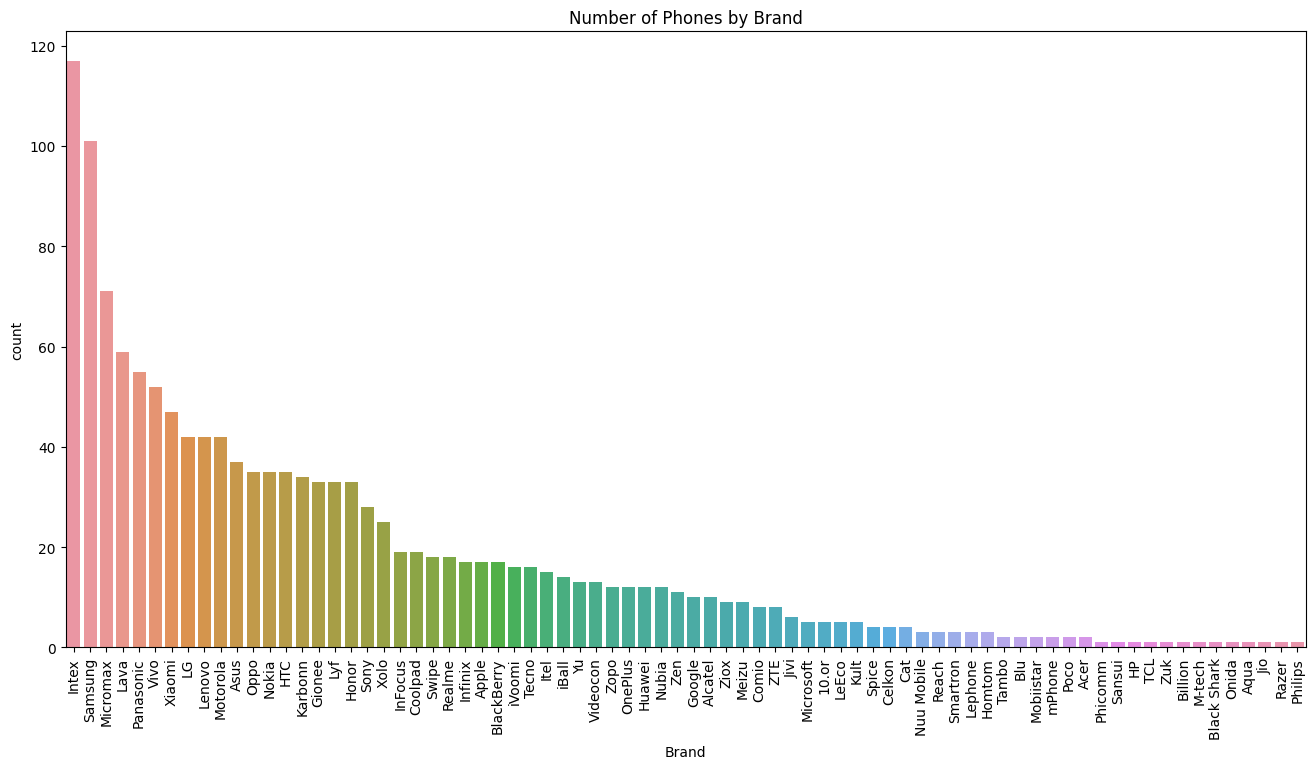

In [10]:
plt.figure(figsize=(16,8))
sns.countplot(df, x = 'Brand', order = df['Brand'].value_counts().index)
plt.title('Number of Phones by Brand')
plt.xticks(rotation = 90); #xticks helps rotate the x axis labels for looks clear.

The distribution of brands in the dataset appears to be unbalanced because some brands release lots of models, such as Samsung, and some brands release much fewer models, such as Apple.

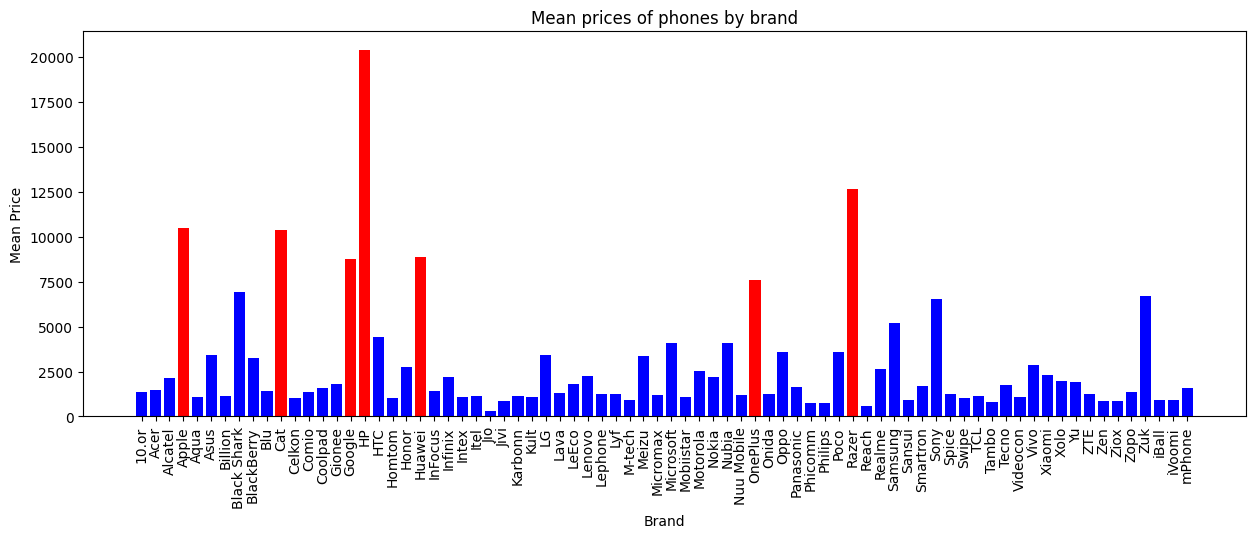

In [11]:
mean_price_brand = df.groupby('Brand')['Price'].mean()
plt.figure(figsize=(15,5))
mean_colors=['r' if m>7500 else 'b' for m in mean_price_brand]
plt.bar(mean_price_brand.index, mean_price_brand,color=mean_colors)
plt.title('Mean prices of phones by brand')
plt.xlabel('Brand')
plt.ylabel('Mean Price')
plt.xticks(rotation = 90);

Red ones are high price brands and blue ones are low price brands.

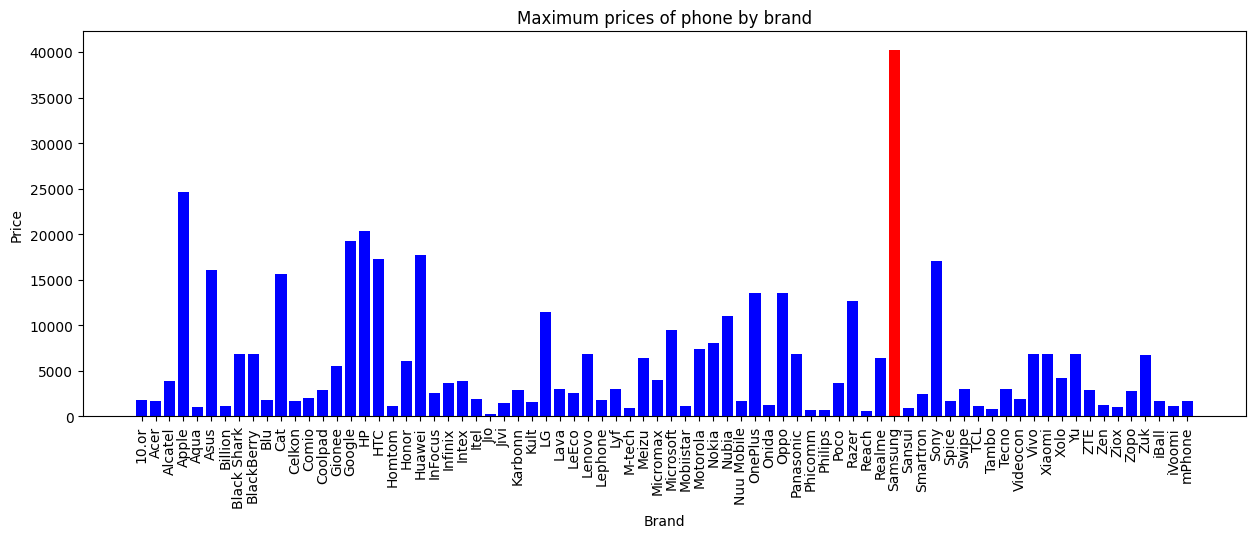

In [12]:
mean_price_brand = df.groupby('Brand')['Price'].max()
plt.figure(figsize=(15,5))
max_colors=['r' if mpb==max(mean_price_brand) else ( 'b') for mpb in mean_price_brand]
plt.bar(mean_price_brand.index, mean_price_brand, color =max_colors)
plt.title('Maximum prices of phone by brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=90);

If we examine the two graphs above, although the brand of the most expensive model in the dataset is Samsung, Samsung's mean price is not that high, which means Samsung has low-priced phones too. If we consider Intex, which has the most phone models, both the mean price and the maximum price of its phones are cheap.

## Visualizing of Battery Capacity

Text(0.5, 1.0, 'Distribution of battery capacity')

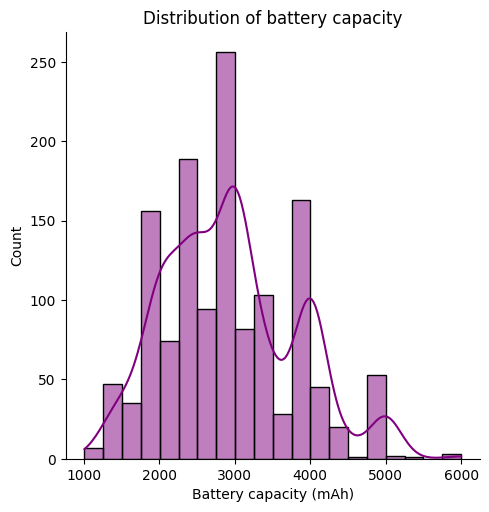

In [13]:
sns.displot( x = 'Battery capacity (mAh)', data = df, bins = 20, kde = True, color='purple');
plt.title("Distribution of battery capacity")

## Analysis and Visualizing of Screen Size

Text(0.5, 1.0, 'Distribution of screen size')

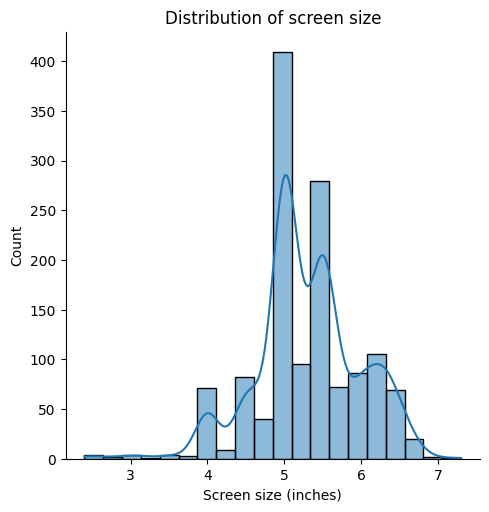

In [14]:
sns.displot( x = 'Screen size (inches)', data = df, bins = 20, kde = True);
plt.title("Distribution of screen size")

We want to see is there any relationship between battery capacity and screen size using scatter diagram.

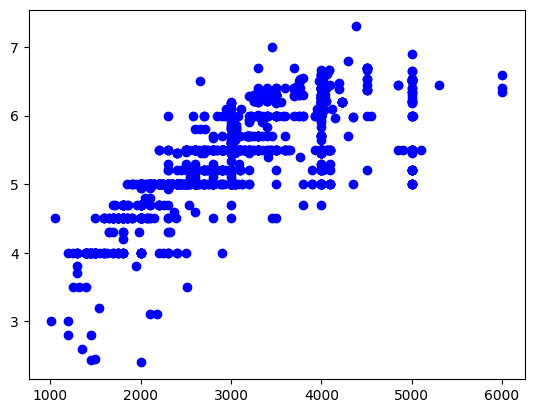

In [15]:
plt.scatter(df['Battery capacity (mAh)'], df['Screen size (inches)'], c='b')

The scatter diagram shows a relationship between battery capacity and screen size. To verify this, let's do the Pearson correlation coefficient test.

In [16]:
stats.pearsonr(df['Battery capacity (mAh)'], df['Screen size (inches)'])

PearsonRResult(statistic=0.7468859032825985, pvalue=9.742837647104012e-243)

By examining the results of the Pearson correlation coefficient test, the correlation between these two features is statistically confirmed that makes sense the bigger screen size requires bigger battery capacity 

## Analyis and Visualizing of Resolution x and Resolution y

Text(0.5, 1.0, 'Distribution of resolution x (Width of the resolution)')

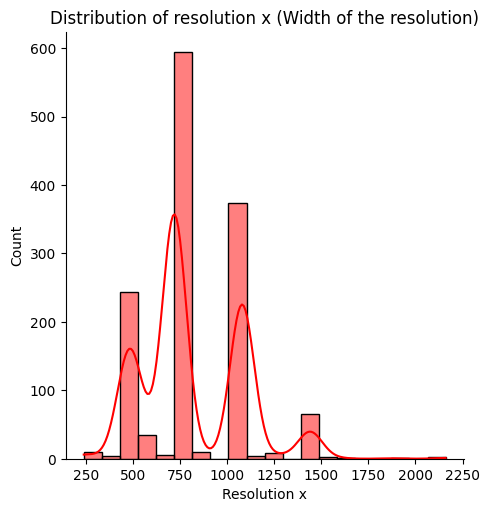

In [17]:
sns.displot( x = 'Resolution x', data = df, bins = 20, kde = True, color = 'r');
plt.title("Distribution of resolution x (Width of the resolution)")

Text(0.5, 1.0, 'Distribution of resolution y (Height of the resolution)')

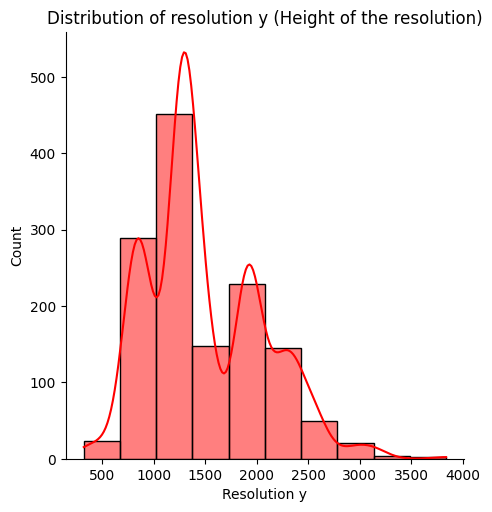

In [20]:
sns.displot( x = 'Resolution y', data = df, bins = 10, kde = True, color = 'r');
plt.title("Distribution of resolution y (Height of the resolution)")

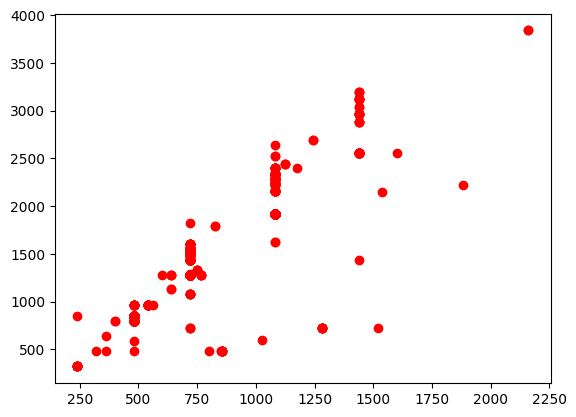

In [19]:
plt.scatter(df['Resolution x'], df['Resolution y'],c='r')

If we look at the scatter graph of Resolution x and Resolution y, it seems there is a relationship between Resolution x and Resolution y. Let's check if there is a relationship by applying the Pearson correlation coefficient test.

In [21]:
stats.pearsonr(df['Resolution x'], df['Resolution y'])

PearsonRResult(statistic=0.9207795334171477, pvalue=0.0)

According to result there is strong correlation between Resolution x and Resolution y.

## Visualizing of Processor

Text(0.5, 1.0, 'Distribution of number of processor cores')

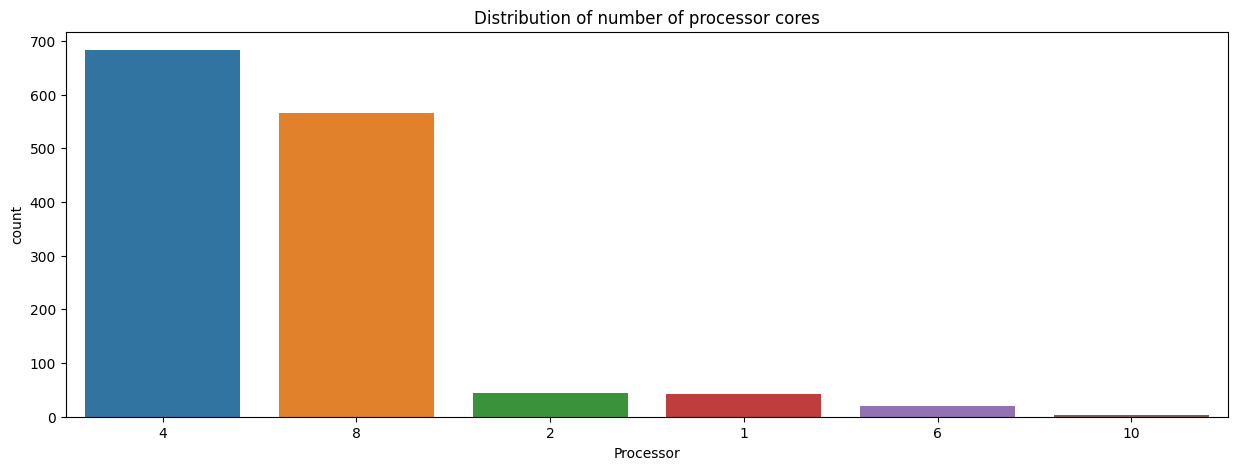

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(df, x = 'Processor', order = df['Processor'].value_counts().index)
plt.title('Distribution of number of processor cores')

Mostly 4 and 8 core processors were used in the phones in the dataset. It is clear that the distribution of number of processor cores are unbalanced.

## Visualizing of RAM

Text(0.5, 1.0, 'Distribution of RAM in megabytes')

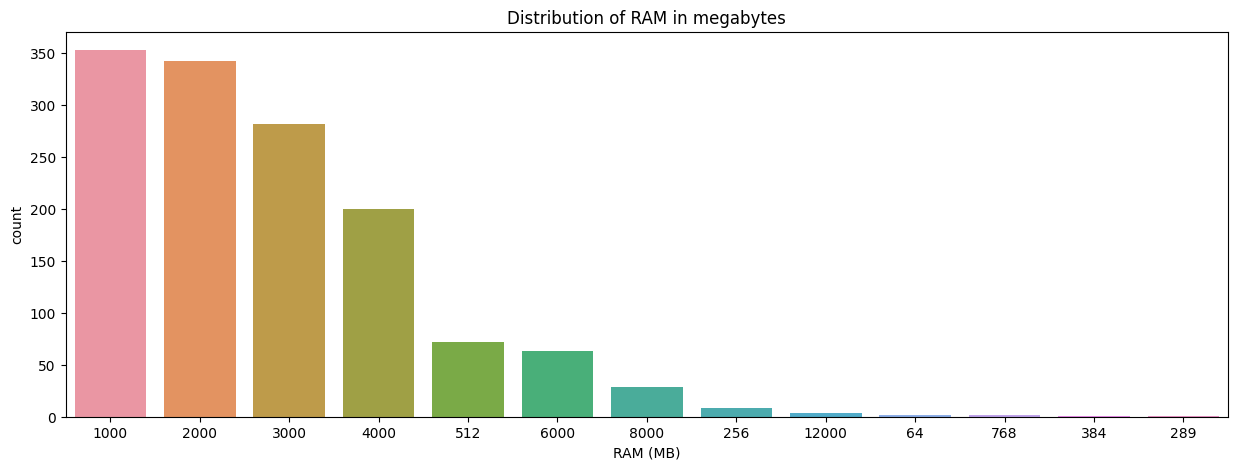

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(df, x = 'RAM (MB)', order = df['RAM (MB)'].value_counts().index)
plt.title('Distribution of RAM in megabytes')

## Visualizing of Internal Storage

Text(0.5, 1.0, 'Distribution of internal storage in gigabytes')

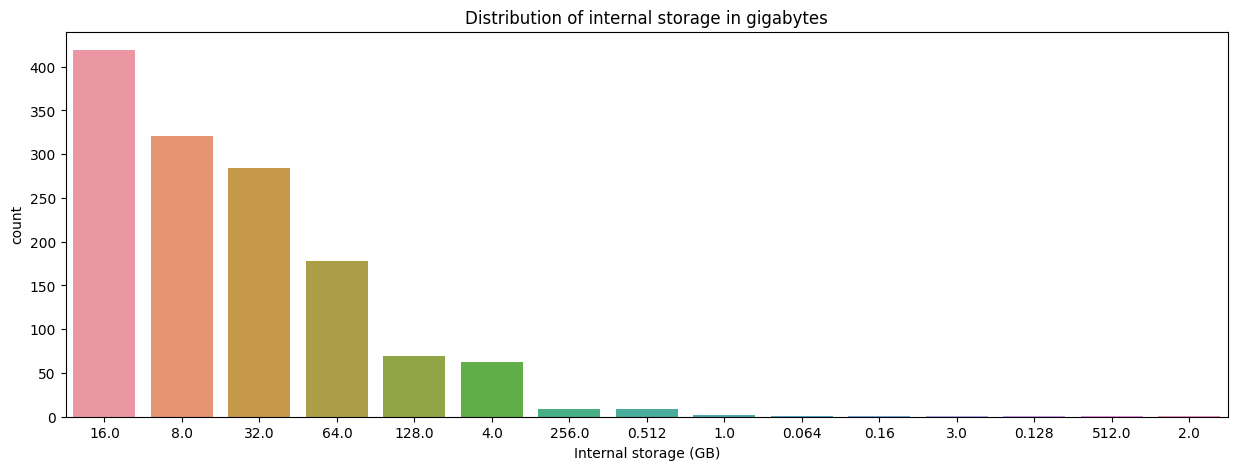

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(df, x = 'Internal storage (GB)', order = df['Internal storage (GB)'].value_counts().index)
plt.title('Distribution of internal storage in gigabytes')

## Visualizing of Rear Camera and Front Camera

Text(0.5, 1.0, 'Distribution of rear camera in megapixels')

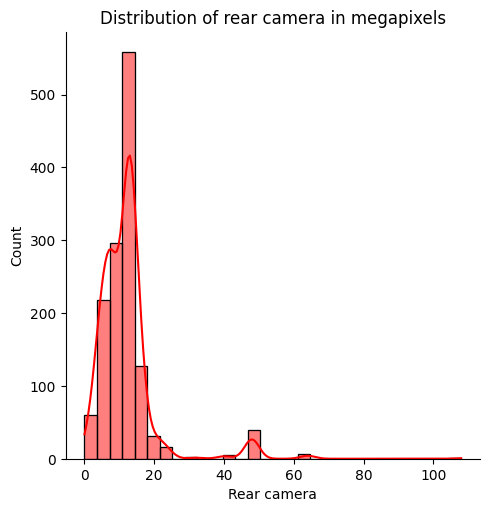

In [25]:
sns.displot( x = 'Rear camera', data = df, bins = 30, kde = True, color='r');
plt.title("Distribution of rear camera in megapixels")

Text(0.5, 1.0, 'Distribution of front camera in megapixels')

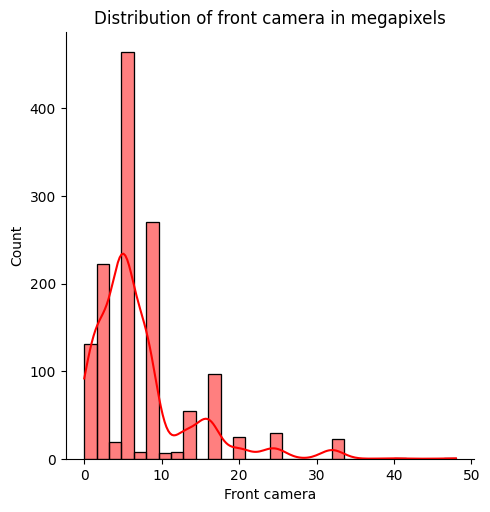

In [26]:
sns.displot( x = 'Front camera', data = df, bins = 30, kde = True, color = 'r');
plt.title("Distribution of front camera in megapixels")

## Analysis and Visualizing of Operating System

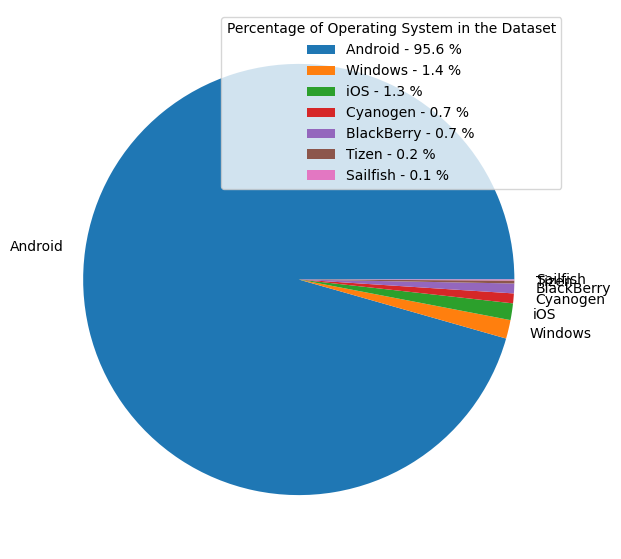

In [27]:
labels=df['Operating system'].value_counts().index
sizes = df['Operating system'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels)
plt.legend(title='Percentage of Operating System in the Dataset', labels=['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, 100*(sizes/sizes.sum()))])

Almost every phone in the dataset has an android operating system, very few phones with other operating systems. 

In [28]:
df_brand_OS=df[['Brand','Operating system']]
df_brand_OS.groupby(["Operating system","Brand"]).first()
df_brand_OS_value_count = df_brand_OS.groupby(["Brand"]).value_counts()
df_brand_OS_value_count_counter=df_brand_OS_value_count.groupby(["Operating system", "Brand"]).count()
df_brand_counter_by_OS=df_brand_OS_value_count_counter.groupby("Operating system").sum()
df_brand_counter_by_OS

Operating system
Android       72
BlackBerry     1
Cyanogen       4
Sailfish       1
Tizen          1
Windows        5
iOS            1
dtype: int64

We want to create pie chart for how many brands have each operating system.

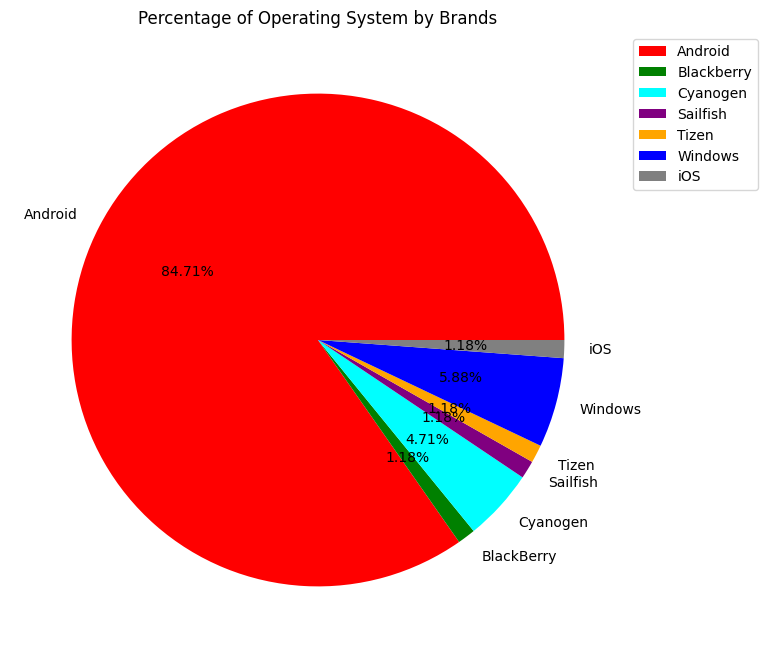

In [29]:
df_brand_counter_by_OS.plot(kind = 'pie', autopct='%1.2f%%',  figsize = (8, 8), colors = ['r','g','cyan','purple','orange','b','grey'])
plt.title('Percentage of Operating System by Brands')
plt.legend(['Android', 'Blackberry','Cyanogen','Sailfish','Tizen','Windows','iOS'],bbox_to_anchor=(1, 1), loc='upper left')
plt.ylabel('')
plt.show()

It is clear that Android has most of the brands which are in the dataset.

<BarContainer object of 7 artists>

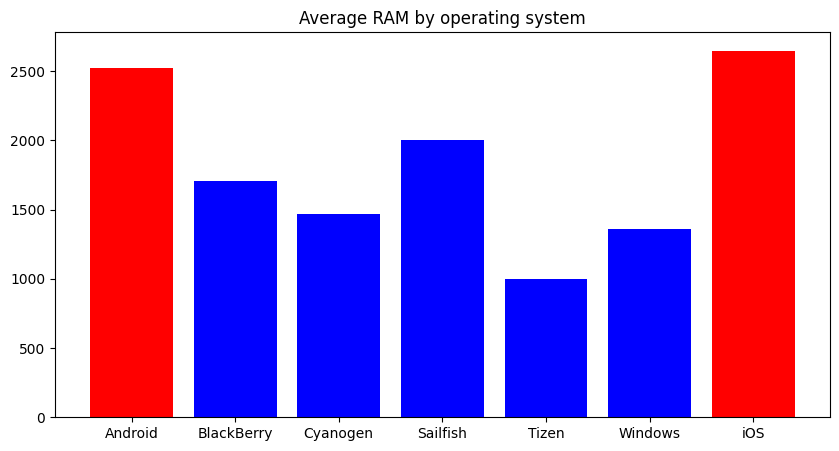

In [30]:
OS_RAM = df.groupby('Operating system')['RAM (MB)'].mean()
plt.figure(figsize=(10,5))
plt.title('Average RAM by operating system')
color_avg_ram=['r' if r > 2000 else('blue') for r in OS_RAM]
plt.bar(OS_RAM.index,OS_RAM, color=color_avg_ram)

Average ram according to operating systems is in the chart above. Phones with the iOS operating system has the highest ram average. However, Android has very close RAM average compared to iOS's RAM average. Thinking the current popular phones, these two OS's processing capacities for catching up the technological developments, so that RAMs must be high.

Text(0.5, 1.0, 'Max price of phone by operating\xa0system')

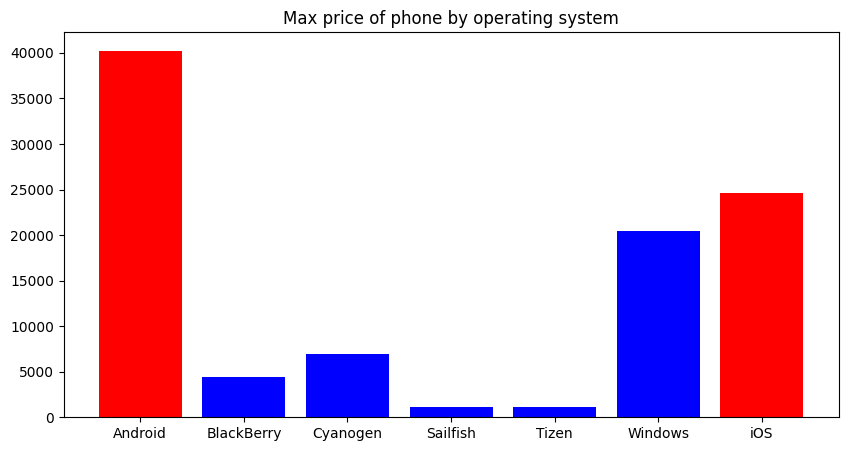

In [31]:
max_price_os = df.groupby('Operating system')['Price'].max()
max_price_color=['r'if O > 22000 else('blue') for O in max_price_os]
plt.figure(figsize=(10,5))
plt.bar(max_price_os.index, max_price_os,color=max_price_color)
plt.title('Max price of phone by operating system')

Text(0.5, 1.0, 'Mean price of phone by operating\xa0system')

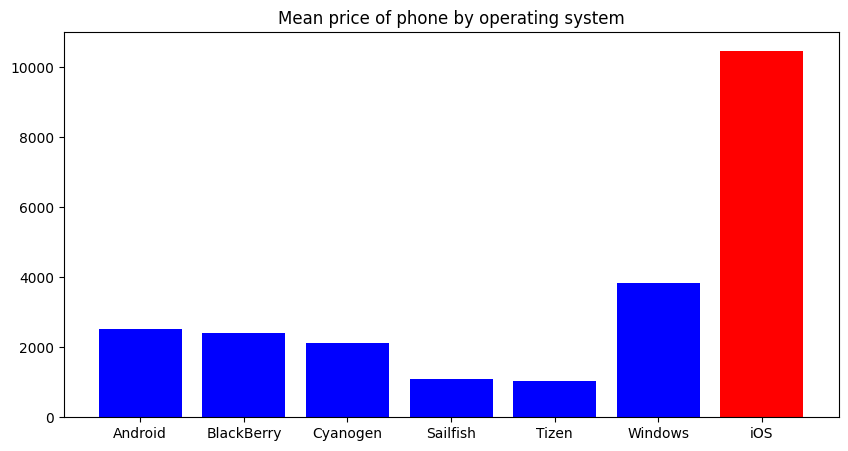

In [32]:
mean_price_os = df.groupby('Operating system')['Price'].mean()
plt.figure(figsize=(10,5))
mean_color=['r'if mpo>10000 else('b') for mpo in mean_price_os]
plt.bar(mean_price_os.index, mean_price_os, color=mean_color)
plt.title('Mean price of phone by operating system')

If we look at the two graphs above, although the most expensive phone's operating system is Android, IOS has made a significant difference in average prices of phone by operating system. If we consider this, the price range of phones with Android operating system is wider than phones with IOS operating system.

## Visualizing of Wi-Fi, Bluetooth, GPS, 3G, 4G/LTE

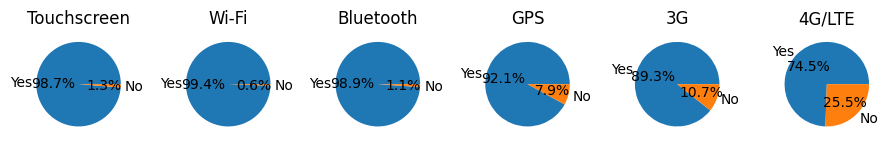

In [33]:
data = [
    {'title': 'Touchscreen','labels': df['Touchscreen'].value_counts().index, 'sizes': df['Touchscreen'].value_counts()},
    {'title': 'Wi-Fi','labels': df['Wi-Fi'].value_counts().index, 'sizes': df['Wi-Fi'].value_counts()},
    {'title': 'Bluetooth', 'labels': df['Bluetooth'].value_counts().index, 'sizes': df['Bluetooth'].value_counts()},
    {'title': 'GPS','labels': df['GPS'].value_counts().index, 'sizes': df['GPS'].value_counts()},
    {'title': '3G','labels': df['3G'].value_counts().index, 'sizes': df['3G'].value_counts()},
    {'title': '4G/LTE','labels': df['4G/ LTE'].value_counts().index, 'sizes': df['4G/ LTE'].value_counts()}
]
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(9, 3))

for ax, pie_data in zip(axes, data):
    ax.pie(pie_data['sizes'], labels=pie_data['labels'], autopct='%1.1f%%')
    ax.set_title(pie_data['title'])
fig.tight_layout()
plt.show()

Almost all phones have touchscreen, Wi-Fi and Bluetooth. Most of the phones have GPS and 3G. 

## Visualizing of Number of SIMs

<AxesSubplot: xlabel='Number of SIMs', ylabel='count'>

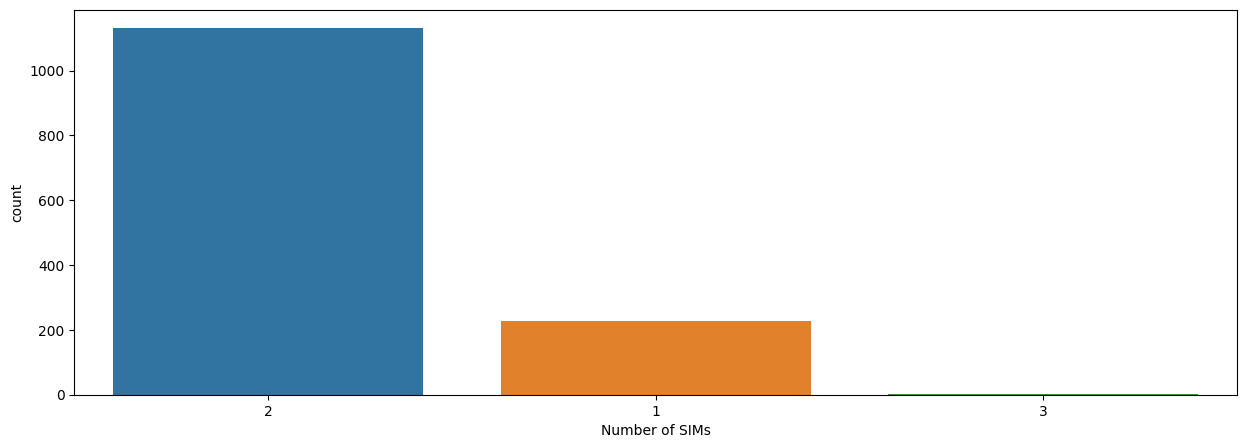

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(df, x = 'Number of SIMs', order = df['Number of SIMs'].value_counts().index)

In [35]:
df['Number of SIMs'].value_counts()

2    1131
1     227
3       1
Name: Number of SIMs, dtype: int64

Only one phone supports 3 SIM cards

## Visualizing of Price

Text(0.5, 1.0, 'Distribution of Prices')

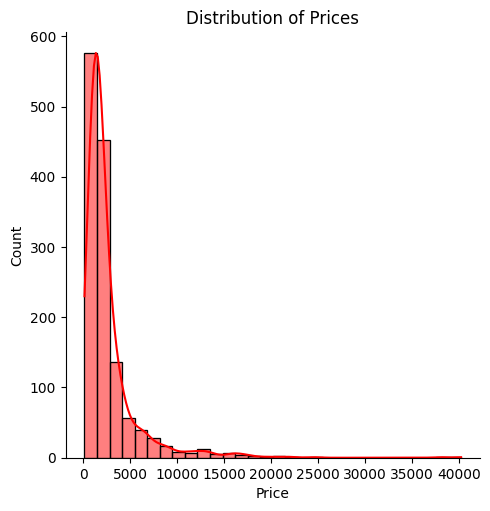

In [36]:
sns.displot( x = 'Price', data = df, bins = 30, kde = True, color='r');
plt.title("Distribution of Prices")

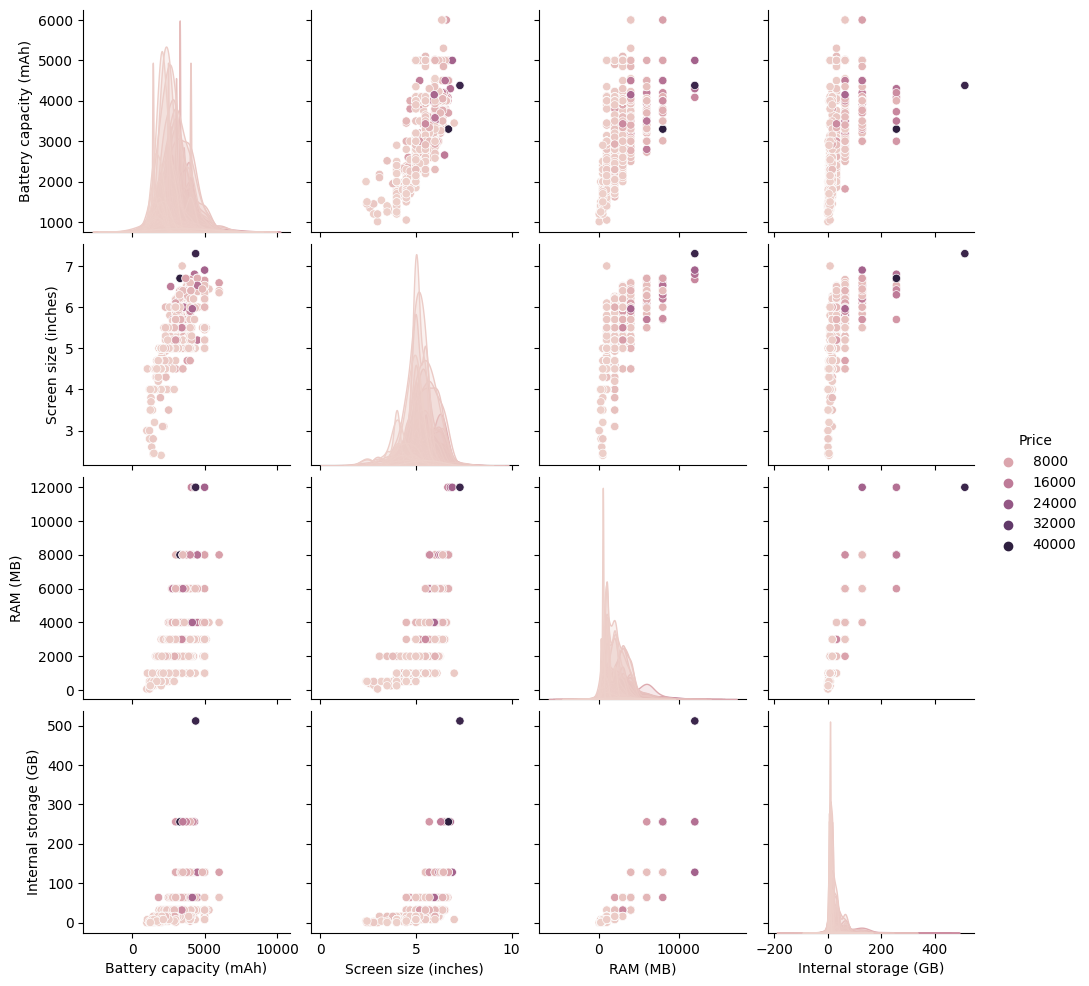

In [37]:
sns.pairplot(df, hue = 'Price', vars = ['Battery capacity (mAh)', 'Screen size (inches)', 'RAM (MB)', 'Internal storage (GB)'] )

## Categorical Variables Encoding

There are some categorical variables in the dataset, therefore it is needed to be encoded.

In [38]:
encoded_df = df.copy()

In [39]:
print(len(df['Name'].unique()), len(df['Brand'].unique()), len(df['Model'].unique()), len(df['Operating system'].unique()))

1359 76 1321 7


Both Name and Model columns do not need to be encoded. Because these columns are too large and they are not be considered for price prediction.

In [40]:
lbl_encoder = LabelEncoder()
encoded_df['Brand'] = lbl_encoder.fit_transform(encoded_df['Brand'])
encoded_df['Operating system'] = lbl_encoder.fit_transform(encoded_df['Operating system'])

Brand and Operating system columns have been encoded by label encoder.

In [41]:
print( df['Touchscreen'].unique(), df['Wi-Fi'].unique(), df['Bluetooth'].unique(), df['GPS'].unique(), df['3G'].unique(), df['4G/ LTE'].unique() )

['Yes' 'No'] ['Yes' 'No'] ['Yes' 'No'] ['Yes' 'No'] ['Yes' 'No'] ['Yes' 'No']


Touchscreen, Wi-Fi, Bluetooth, GPS, 3G and 4G/LTE columns contain 'Yes' or 'No'. These columns contain only categorical value, they need to be encoded to look at correlation coefficient and apply machine learning models. Since these columns contain only 'Yes' or 'No', they can be encoded using binary encoder. 

In [42]:
def binaryEncoder(df, name):
    for i in range(len(df[name])):
        if df[name][i] == 'Yes':
            df[name][i] = 1
        else:
            df[name][i] = 0

binaryEncoder function takes the data frame and the columns containing 'Yes', 'No' and assigns 1 to values with yes in the column and 0 to values with no.

In [43]:
binaryEncoder(encoded_df, 'Touchscreen')
binaryEncoder(encoded_df, 'Wi-Fi')
binaryEncoder(encoded_df, 'Bluetooth')
binaryEncoder(encoded_df, 'GPS')
binaryEncoder(encoded_df, '3G')
binaryEncoder(encoded_df, '4G/ LTE')

C:\Users\90546\AppData\Local\Temp\ipykernel_211496\1955392768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name][i] = 1
C:\Users\90546\AppData\Local\Temp\ipykernel_211496\1955392768.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name][i] = 0


In [44]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    1359 non-null   object 
 1   Brand                   1359 non-null   int32  
 2   Model                   1359 non-null   object 
 3   Battery capacity (mAh)  1359 non-null   int64  
 4   Screen size (inches)    1359 non-null   float64
 5   Touchscreen             1359 non-null   object 
 6   Resolution x            1359 non-null   int64  
 7   Resolution y            1359 non-null   int64  
 8   Processor               1359 non-null   int64  
 9   RAM (MB)                1359 non-null   int64  
 10  Internal storage (GB)   1359 non-null   float64
 11  Rear camera             1359 non-null   float64
 12  Front camera            1359 non-null   float64
 13  Operating system        1359 non-null   int32  
 14  Wi-Fi                   1359 non-null   

The data types of the variables in the encoded columns appear as objects after encoding, we convert them to integers.

In [45]:
encoded_df[['Touchscreen','Wi-Fi', 'Bluetooth', 'GPS', '3G', '4G/ LTE']] = encoded_df[['Touchscreen', 'Wi-Fi','Bluetooth', 'GPS', '3G', '4G/ LTE']].astype('int32')

In [46]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    1359 non-null   object 
 1   Brand                   1359 non-null   int32  
 2   Model                   1359 non-null   object 
 3   Battery capacity (mAh)  1359 non-null   int64  
 4   Screen size (inches)    1359 non-null   float64
 5   Touchscreen             1359 non-null   int32  
 6   Resolution x            1359 non-null   int64  
 7   Resolution y            1359 non-null   int64  
 8   Processor               1359 non-null   int64  
 9   RAM (MB)                1359 non-null   int64  
 10  Internal storage (GB)   1359 non-null   float64
 11  Rear camera             1359 non-null   float64
 12  Front camera            1359 non-null   float64
 13  Operating system        1359 non-null   int32  
 14  Wi-Fi                   1359 non-null   

In [47]:
encoded_df # After encoding

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus 7T Pro McLaren Edition,44,7T Pro McLaren Edition,4085,6.67,1,1440,3120,8,12000,...,48.0,16.0,0,1,1,1,2,1,1,13569.54
1,Realme X2 Pro,53,X2 Pro,4000,6.50,1,1080,2400,8,6000,...,64.0,16.0,0,1,1,1,2,1,1,6439.77
2,iPhone 11 Pro Max,3,iPhone 11 Pro Max,3969,6.50,1,1242,2688,6,4000,...,12.0,12.0,6,1,1,1,2,1,1,24587.00
3,iPhone 11,3,iPhone 11,3110,6.10,1,828,1792,6,4000,...,12.0,12.0,6,1,1,1,2,1,1,14467.00
4,LG G8X ThinQ,29,G8X ThinQ,4000,6.40,1,1080,2340,8,6000,...,12.0,32.0,0,1,1,1,1,0,0,11497.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,Intex Aqua A2,23,Aqua A2,1500,4.00,1,480,800,4,512,...,5.0,0.3,0,1,1,1,2,1,0,597.77
1355,Videocon Infinium Z51 Nova+,63,Infinium Z51 Nova+,2000,5.00,1,480,854,4,1000,...,8.0,5.0,0,1,1,1,2,1,0,676.20
1356,Intex Aqua Y4,23,Aqua Y4,1700,4.50,1,480,854,2,512,...,5.0,2.0,0,1,1,0,2,1,0,689.77
1357,iBall Andi4 B20,73,Andi4 B20,1250,4.00,1,480,800,1,256,...,2.0,0.3,0,1,1,1,2,1,0,574.54


## Correlations Between Categorical Variables and Price

In [48]:
print(stats.pearsonr(encoded_df['Touchscreen'],encoded_df['Price']))
print(stats.pearsonr(encoded_df['Wi-Fi'],encoded_df['Price']))
print(stats.pearsonr(encoded_df['Bluetooth'],encoded_df['Price']))
print(stats.pearsonr(encoded_df['GPS'],encoded_df['Price']))
print(stats.pearsonr(encoded_df['3G'],encoded_df['Price']))
print(stats.pearsonr(encoded_df['4G/ LTE'],encoded_df['Price']))

PearsonRResult(statistic=0.05045959862761949, pvalue=0.06293551576224567)
PearsonRResult(statistic=0.02850575313028054, pvalue=0.2936721000141156)
PearsonRResult(statistic=0.027999346137467275, pvalue=0.30233566180499144)
PearsonRResult(statistic=0.06680736657777302, pvalue=0.013765926995191817)
PearsonRResult(statistic=-0.0037686950441349412, pvalue=0.889604914107395)
PearsonRResult(statistic=0.149792018020634, pvalue=2.885022301714748e-08)


The correlation coefficients between Touchscreen, Wi-Fi, Bluetooth, GPS, 3G features and price are close to 0. Therefore, there is no significant relationship was found between these features and price.The reason why the Touchscreen, Wi-Fi, Bluetooth, GPS, 3G features give a very low correlation coefficient with the price may be due to the uneven distribution of these features in the dataset. The correlation coefficient between the 4G/LTE feature and the price was found to be 0.15, but this number also indicates a weak correlation between the 4G/LTE feature and the price. The reason why the correlation coefficient of the 4G/LTE feature is higher than the Touchscreen, Wi-Fi, Bluetooth, GPS, 3G features is that it is more evenly distributed in the dataset than these features.

In [49]:
print(stats.pearsonr(encoded_df['Brand'],encoded_df['Price']))

PearsonRResult(statistic=-0.04895463799234185, pvalue=0.07121326842695117)


The correlation coefficient between Brand and Price is close to 0. Although there is a relationship between phone brand and price in real life, when the Pearson correlation coefficient test was performed, no significant relationship was found between brand and price in this data set. The reason for this may be that there are too many brands but not enough examples in some brands.

## Outlier Detection

In [50]:
def outlierDetection(df, col):
    upper = df[col].mean() + 3*df[col].std()
    lower = df[col].mean() - 3*df[col].std()
    indices = df[((df[col] > upper)|(df[col] < lower))].index.to_list()
    return  indices

outlierDetection function returns the indices of the outliers in the corresponding column of the data frame.

In [51]:
indices = (outlierDetection(encoded_df, 'Battery capacity (mAh)') 
+outlierDetection(encoded_df, 'Screen size (inches)') 
+outlierDetection(encoded_df, 'Resolution x')
+outlierDetection(encoded_df, 'Resolution y')
+outlierDetection(encoded_df, 'Processor')
+outlierDetection(encoded_df, 'RAM (MB)')
+outlierDetection(encoded_df, 'Internal storage (GB)')
+outlierDetection(encoded_df, 'Rear camera')
+outlierDetection(encoded_df, 'Front camera')
+outlierDetection(encoded_df, 'Number of SIMs')
+outlierDetection(encoded_df, 'Price'))
indices = list(np.unique(indices))
len(indices)

114

In [52]:
encoded_df.drop(index=indices, inplace = True)

Dropped outliers in the dataset.

# Construction and Evaluation of Models

In [56]:
num = ['Battery capacity (mAh)', 'Screen size (inches)','Resolution x', 'Resolution y', 'Processor','RAM (MB)',
       'Internal storage (GB)', 'Rear camera','Front camera', 'Number of SIMs']
scaler = MinMaxScaler()
scaled = scaler.fit_transform(encoded_df[num])
encoded_df[num] = scaled
X = encoded_df.drop(columns=['Name', 'Model', 'Price'])
y = encoded_df.iloc[:,-1]
X.shape, y.shape

((1245, 18), (1245,))

In [57]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Regression models are one of the most widely used types of machine learning methods. Regression models are used to predict the relationship between a target variable and one or more independent variables. The target variable is the variable that the model is trying to predict, and the independent variables are the variables that affect this prediction of the model. In this project, we tried 3 different regression models as we will try to estimate the price (dependent variable) using phone features (independent variables).

### Linear Regression

In [58]:
LR = LinearRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
LR_mape = mean_absolute_percentage_error(y_test, LR_pred)
LR_mse = mean_squared_error(y_test, LR_pred)
LR_rmse = np.sqrt(LR_mse)
LR_R2 = r2_score(y_test, LR_pred)
print('Mean percentage absolute error:',LR_mape,'\nMean squared error:', LR_mse,'\nRoot mean square Error:', LR_rmse,'\nR^2 score:', LR_R2)

Mean percentage absolute error: 0.42241650663756747 
Mean squared error: 1597031.2946660006 
Root mean square Error: 1263.7370354096618 
R^2 score: 0.4380197986511736


In [59]:
print(LR_mape, LR_mse, LR_rmse ,LR_R2)

0.42241650663756747 1597031.2946660006 1263.7370354096618 0.4380197986511736


### Random Forest Regression

In [60]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)
RF_mape = mean_absolute_percentage_error(y_test, RF_pred)
RF_mse = mean_squared_error(y_test, RF_pred)
RF_rmse = np.sqrt(RF_mse)
RF_R2 = r2_score(y_test, RF_pred)
print('Mean percentage absolute error:',RF_mape,'\nMean squared error:', RF_mse,'\nRoot mean square Error:', RF_rmse,'\nR^2 score:', RF_R2)

Mean percentage absolute error: 0.359792800542935 
Mean squared error: 1186491.911193644 
Root mean square Error: 1089.2620948117326 
R^2 score: 0.5824847231369954


In [61]:
RF_feature_imp = RF.feature_importances_
for i,v in enumerate(RF_feature_imp):
    print('Feature: %0d, Score: %.5f'%(i,v))

Feature: 0, Score: 0.08326
Feature: 1, Score: 0.08004
Feature: 2, Score: 0.07604
Feature: 3, Score: 0.00027
Feature: 4, Score: 0.11441
Feature: 5, Score: 0.28101
Feature: 6, Score: 0.02832
Feature: 7, Score: 0.04292
Feature: 8, Score: 0.03151
Feature: 9, Score: 0.09061
Feature: 10, Score: 0.07054
Feature: 11, Score: 0.06846
Feature: 12, Score: 0.00002
Feature: 13, Score: 0.00025
Feature: 14, Score: 0.00173
Feature: 15, Score: 0.02209
Feature: 16, Score: 0.00355
Feature: 17, Score: 0.00496


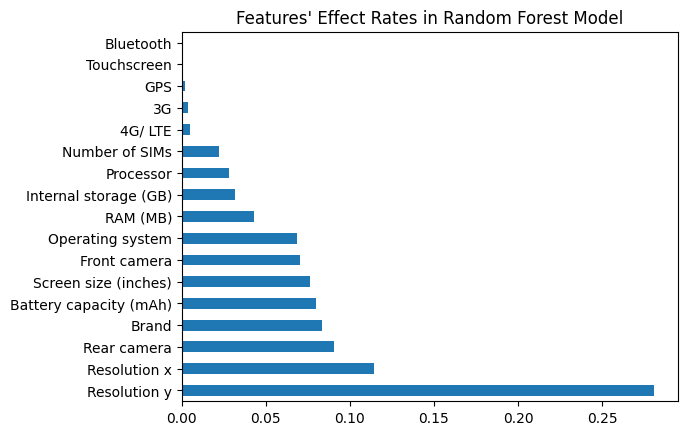

In [62]:
index= X.columns
importance = pd.Series(RF_feature_imp, index=index)
importance.nlargest(17).plot(kind='barh')
plt.title("Features' Effect Rates in Random Forest Model")
plt.show()

In determining phone price, Resolution x, Resolution y, Rear camera, Brand, Battery capacity and Screen size are the 6 most influential features in Random Forest Model.

### Decision Tree Regression

In [63]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)
DT_mape = mean_absolute_percentage_error(y_test, DT_pred)
DT_mse = mean_squared_error(y_test, DT_pred)
DT_rmse = np.sqrt(DT_mse)
DT_R2 = r2_score(y_test, DT_pred)
print('Mean percentage absolute error:',DT_mape,'\nMean squared error:', DT_mse,'\nRoot mean square Error:', DT_rmse,'\nR^2 score:', DT_R2)

Mean percentage absolute error: 0.4660769463205371 
Mean squared error: 2045559.4324730856 
Root mean square Error: 1430.2305522093582 
R^2 score: 0.28018699096774247


In [64]:
DT_feature_imp = DT.feature_importances_
for i,v in enumerate(DT_feature_imp):
    print('Feature: %0d, Score: %.5f'%(i,v))

Feature: 0, Score: 0.06996
Feature: 1, Score: 0.09687
Feature: 2, Score: 0.07712
Feature: 3, Score: 0.00024
Feature: 4, Score: 0.00028
Feature: 5, Score: 0.37606
Feature: 6, Score: 0.04271
Feature: 7, Score: 0.05162
Feature: 8, Score: 0.01287
Feature: 9, Score: 0.08304
Feature: 10, Score: 0.07204
Feature: 11, Score: 0.07041
Feature: 12, Score: 0.00003
Feature: 13, Score: 0.00009
Feature: 14, Score: 0.00058
Feature: 15, Score: 0.04133
Feature: 16, Score: 0.00175
Feature: 17, Score: 0.00300


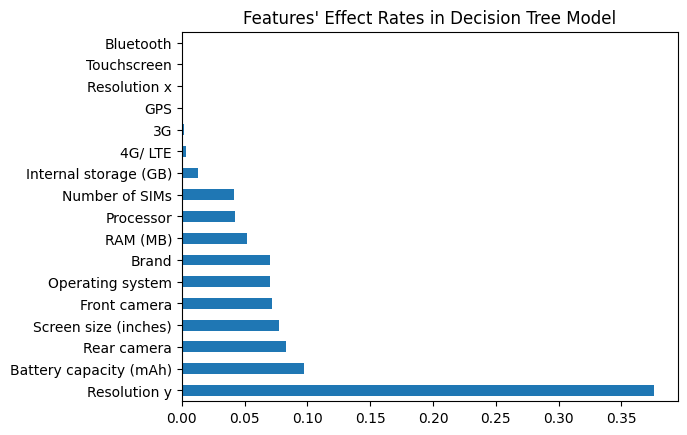

In [65]:
index= X.columns
importance = pd.Series(DT_feature_imp, index=index)
importance.nlargest(17).plot(kind='barh')
plt.title("Features' Effect Rates in Decision Tree Model")
plt.show()

In determining phone price, Resolution x, Rear camera, Battery capacity, Front camera, Screen size and Brand are the 6 most influential features in Decision Tree Model. However Operating system has been as effective as the brand.

## Correlation Heatmap

C:\Users\90546\AppData\Local\Temp\ipykernel_211496\3471941843.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = encoded_df.corr() #Correlation matrix heatmap after encoding.


<AxesSubplot: >

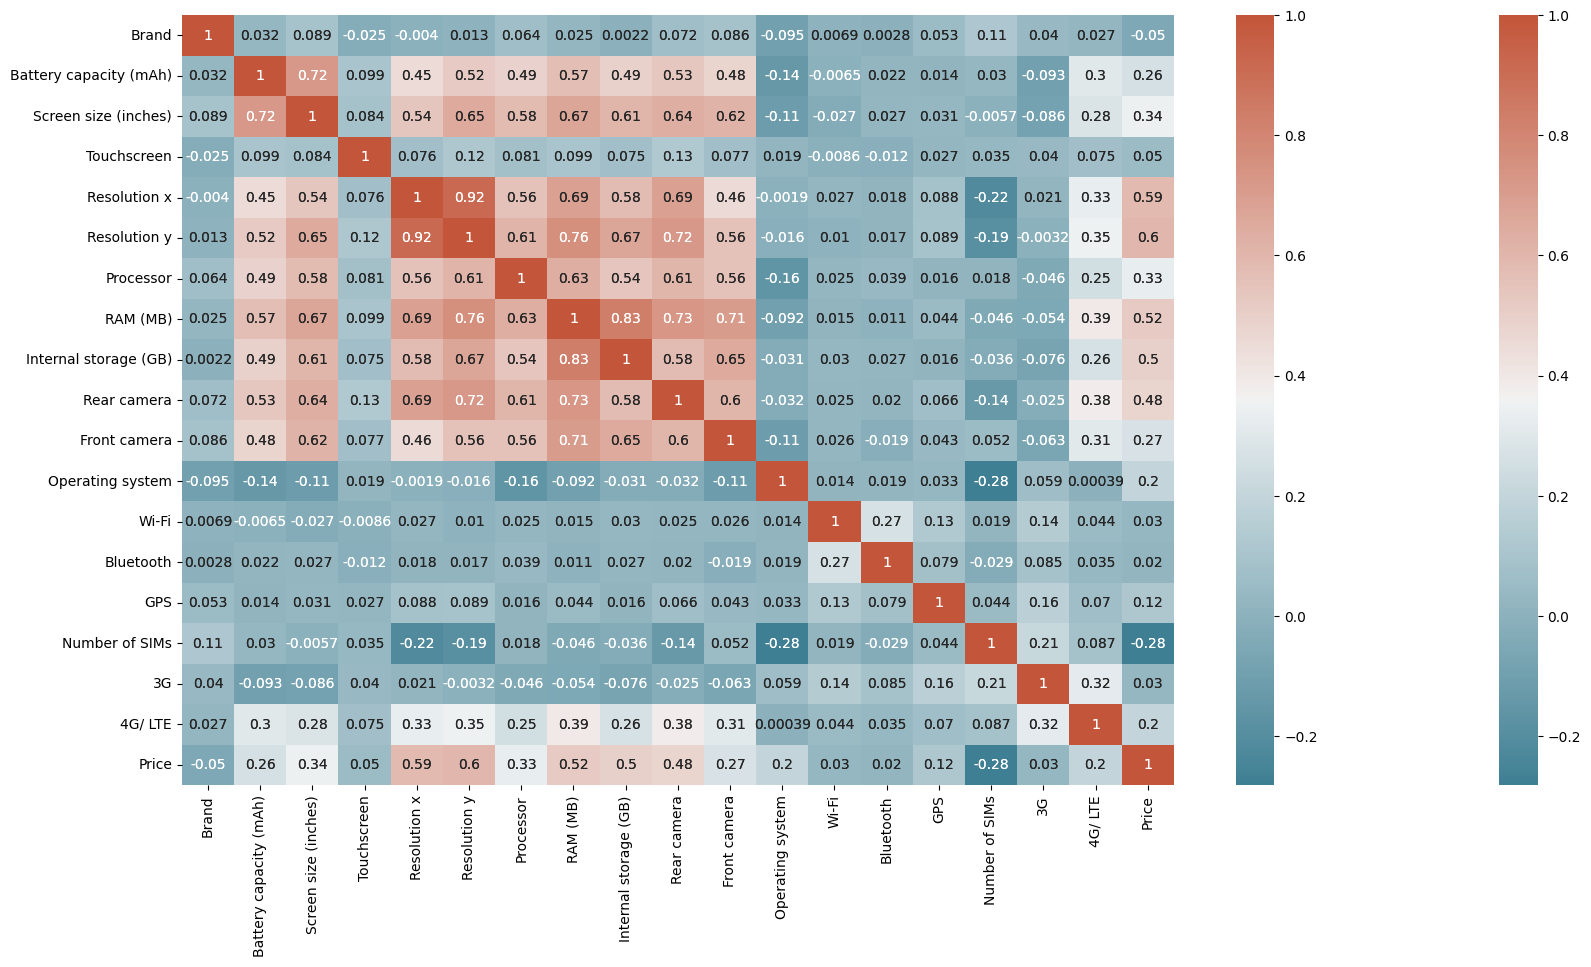

In [66]:
correlation_matrix = encoded_df.corr() #Correlation matrix heatmap after encoding.
plt.subplots(figsize=(20,10))
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

In the regression, the presence of a high correlation between the independent variables may adversely affect the performance of the model. This may mean that there is a very high correlation between the independent variables and may reduce the reliability of the model's predictions. Therefore, it may be appropriate to exclude independent variables with a high correlation value from the model. When we try all 3 regression models over all features, it is seen that they give results with high error rate, because there are high correlation values between independent variables.

# Results

By analyzing the data, we tried 3 different regression models to predict the phone price from the features in the dataset. However, we observed that all three of our models had high error rates. The reasons for this are the high correlation between independent variables, the unbalanced distribution of features in the dataset, and the small dataset. As a result, we could not achieve a successful result in our 3 regression models. For models to have lower error rates, the data set should be larger, and the distribution of features in the data set should be balanced.

# Distribution of Roles

Since the other member of our team, Batuhan Yaşar Sarıoğlu, dropped out of the course, our task distribution in the proposal has changed.<br>
Visualizing | Baran Aslan<br>
Exploring and Analizing Data | Ahmet Erden & Baran Aslan<br>
Encoding categorical variables | Ahmet Erden<br>
Outlier Detection | Ahmet Erden & Baran Aslan<br>
Constructing Linear Regression Model | Ahmet Erden <br>
Constructing Random Forest Regression Model| Ahmet Erden <br>
Constructing Decision Tree Regression Model | Ahmet Erden<br>
Evaluating the each of the models | Ahmet Erden & Baran Aslan<br>
Model comparison | Ahmet Erden & Baran Aslan<br>
Deciding the best model| Ahmet Erden & Baran Aslan